- Book: Natural Language Processing With Transformers, Revised Edition

## Experiencing Dataset

In [1]:
!pip install datasets

In [2]:
from datasets import list_datasets

In [3]:
all_datasets = list_datasets()
print(f'There are {len(all_datasets)} datasets currently available on the Hub')
print(f'The first 10 are: {all_datasets[:10]}')

<ipython-input-3-4db0eebe615c>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


There are 53099 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [4]:
from datasets import load_dataset

In [5]:
emotions = load_dataset('emotion')
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train = emotions['train']
train

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
len(train)

16000

In [8]:
# Rows are represented as dictionaries
train[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [9]:
train.column_names

['text', 'label']

In [10]:
train.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

## Using Pandas

In [11]:
import pandas as pd

In [12]:
# Converting Dataset to DataFrame
emotions.set_format(type='pandas')
df_train = emotions['train'][:]
df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [13]:
emotions['train'].features['label']

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [14]:
# Converting integers labels to string
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

In [15]:
# Creating a new column
df_train['label_name'] = df_train['label'].apply(label_int2str)
df_train.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Looking at the Class Distribution

In [16]:
import matplotlib.pyplot as plt

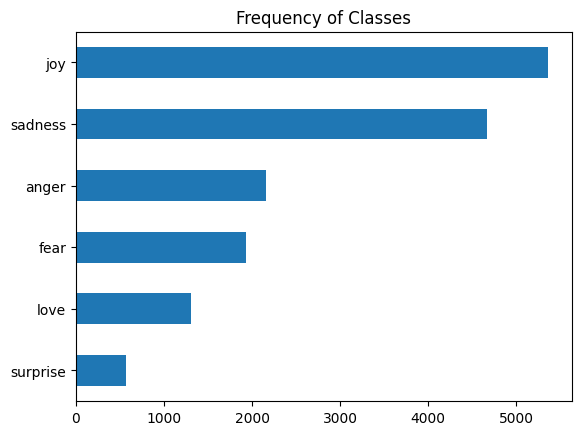

In [17]:
df_train['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


## How Long are the Tweets?

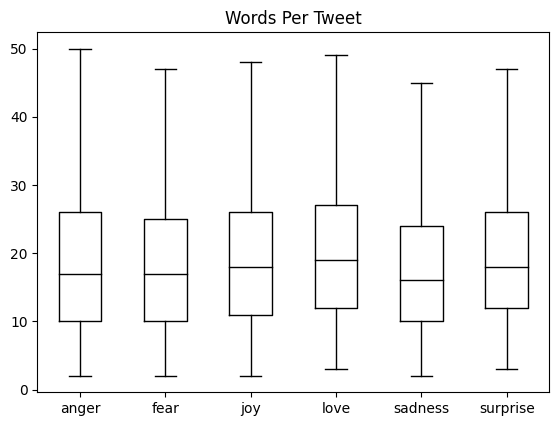

In [19]:
df_train['Words Per Tweet'] = df_train['text'].str.split().apply(len)
df_train.boxplot('Words Per Tweet', by='label_name', grid=False,
                 showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

## Reseting the Format (no need for DataFrames anymore)

In [20]:
emotions.reset_format()

## From Text to Tokens

### Character Tokenization

In [21]:
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
tokenized_text

['T',
 'o',
 'k',
 'e',
 'n',
 'i',
 'z',
 'i',
 'n',
 'g',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'r',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'L',
 'P',
 '.']

### Numericalization

In [22]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [23]:
# Transforming it to a list of integers
input_ids = [token2idx[token] for token in tokenized_text]
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

### Converting the Ordinal Scale to the One-Hot

In [24]:
import torch
import torch.nn.functional as F

In [25]:
len(token2idx)

20

In [26]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [27]:
print(f'Token: {tokenized_text[0]}')
print(f'Tensor index: {input_ids[0]}')
print(f'One-hot: {one_hot_encodings[0]}')

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Word Tokenization

In [28]:
tokenized_text = text.split()
tokenized_text

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']

## Subword Tokenization

In [29]:
!pip install transformers

In [30]:
# AutoTokenizer allows to quickly switch between models
from transformers import AutoTokenizer

In [31]:
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [32]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [33]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [34]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing text is a core task of nlp. [SEP]'

In [35]:
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 512)

In [36]:
# Names of the fields the model expects in its forward pass
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [37]:
# Applying the tokenizer to a batch of examples
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [38]:
tokenize(emotions['train'][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

- The first element of input_ids is shorter than the second, so zeros have been added to that element to make them the same length

In [39]:
# Applying the function across all the splits in the corpus
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
emotions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

## Using Pretrained Models

- **hidden_states are the outputs of each layer in the transformer architecture**

In [40]:
# Convert the token encodings to embeddings, and feeds them to the encoder
# stack to return the hidden states
from transformers import AutoModel

In [41]:
model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [42]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')
print(f'Input tensor shape: {inputs["input_ids"].size()}')

Input tensor shape: torch.Size([1, 6])


In [43]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

- [batch_size, n_tokens]

In [44]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])

In [45]:
### EXAMPLE of ** (unpacking)
d = {'a': 0, 'b': 1, 'c': 2}
new = {**d, 'd': 3}
print(new)

{'a': 0, 'b': 1, 'c': 2, 'd': 3}


In [46]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [47]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [48]:
# Getting the first ([CLS]) token
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [49]:
# Getting the last_hidden_state for the whole dataset
# by creating a new column hidden_state
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k, v in batch.items()
                if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {'hidden_state': last_hidden_state[:, 0].cpu().numpy()}

In [50]:
# Model expects tensors as inputs
emotions_encoded.set_format('torch',
                            columns=['input_ids', 'attention_mask', 'label'])

In [51]:
# Extracting the hidden states across all splits
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

In [52]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

### Creating a Feature Matrix

In [53]:
import numpy as np

In [54]:
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [55]:
!pip install umap-learn

In [56]:
# Will use UMAP to project the 768D vectors down to 2D
# and use MinMaxScaler to scale the features to [0,1] interval
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [57]:
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.487162,6.300721,0
1,-2.902199,5.681006,0
2,5.453039,2.802622,3
3,-2.285828,3.409588,2
4,-3.194596,3.799879,3


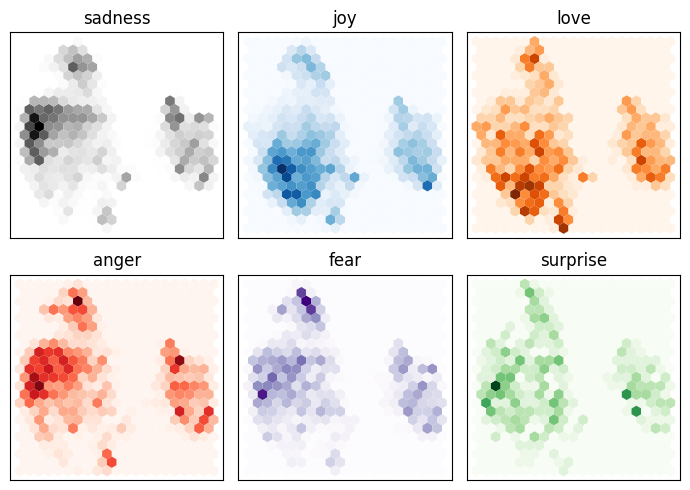

In [58]:
# Plotting the density of the labels
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f'label == {i}')
    axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

## Training a Classifier

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

In [61]:
# Comparing the results with a Dummy Classifier
from sklearn.dummy import DummyClassifier

In [62]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

## Confusion Matrix

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [64]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.title('Normalized Confusion Matrix')
    plt.show()

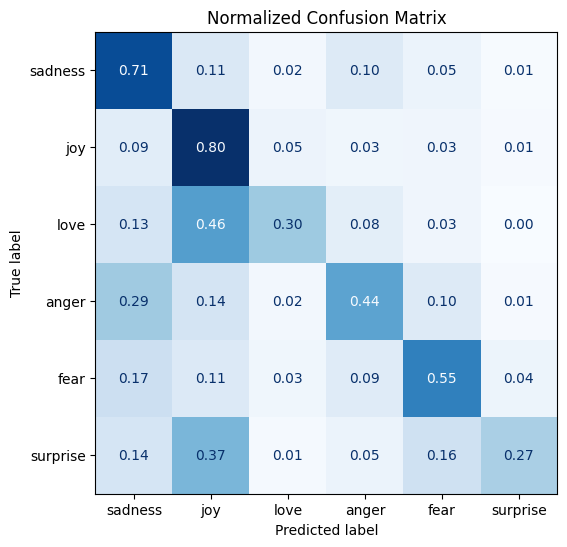

In [65]:
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## Fine-Tuning

In [66]:
from transformers import AutoModelForSequenceClassification

In [67]:
num_labels = 6 # six sentiments
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [68]:
# Defining the performance metrics
from sklearn.metrics import accuracy_score, f1_score

In [81]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1}

## Training the Model

In [70]:
from huggingface_hub import notebook_login

In [71]:
notebook_login()

In [77]:
# Define training parameters
from transformers import Trainer, TrainingArguments

In [78]:
!pip install accelerate -U

In [79]:
BATCH_SIZE = 64

logging_steps = len(emotions_encoded['train']) // BATCH_SIZE
model_name = f'{model_ckpt}-finetuned-emotion'
training_args = TrainingArguments(output_dir=model_name,
                                   num_train_epochs=2,
                                   learning_rate=2e-5,
                                   per_device_train_batch_size=BATCH_SIZE,
                                   per_device_eval_batch_size=BATCH_SIZE,
                                   weight_decay=0.01,
                                   evaluation_strategy='epoch',
                                   disable_tqdm=False,
                                   logging_steps=logging_steps,
                                   push_to_hub=True,
                                   log_level='error')

In [82]:
trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset=emotions_encoded['validation'],
                  tokenizer=tokenizer)
trainer.train()

/content/distilbert-base-uncased-finetuned-emotion is already a clone of https://huggingface.co/Mathvivas/distilbert-base-uncased-finetuned-emotion. Make sure you pull the latest changes with `repo.git_pull()`.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.110900,0.180026,0.929500,0.930252
2,0.111000,0.161208,0.936000,0.936232


TrainOutput(global_step=500, training_loss=0.1109826774597168, metrics={'train_runtime': 236.8329, 'train_samples_per_second': 135.116, 'train_steps_per_second': 2.111, 'total_flos': 720342861696000.0, 'train_loss': 0.1109826774597168, 'epoch': 2.0})

In [83]:
# Getting the predictions
preds_output = trainer.predict(emotions_encoded['validation'])
preds_output.metrics

{'test_loss': 0.16120800375938416,
 'test_accuracy': 0.936,
 'test_f1': 0.9362324535821077,
 'test_runtime': 3.9853,
 'test_samples_per_second': 501.843,
 'test_steps_per_second': 8.029}

In [86]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_preds[:5]

array([0, 0, 2, 3, 1])

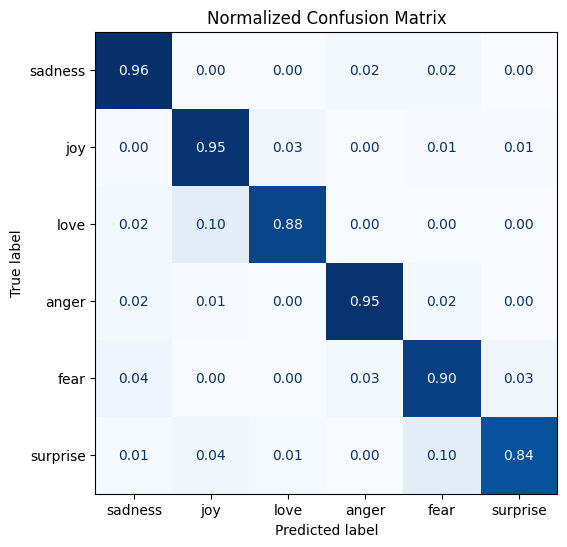

In [87]:
plot_confusion_matrix(y_preds, y_valid, labels)

## Error Analysis

In [88]:
from torch.nn.functional import cross_entropy

In [89]:
def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k, v in batch.items()
                if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch['label'].to(device),
                             reduction='none')

    # Place outputs ib CPU for compatibility with other dataset columns
    return {'loss': loss.cpu().numpy(),
            'predicted_label': pred_label.cpu().numpy()}

In [90]:
# Convert the dataset back to PyTorch Tensors
emotions_encoded.set_format('torch',
                            columns=['input_ids', 'attention_mask', 'label'])

# Compute loss values
emotions_encoded['validation'] = emotions_encoded['validation'].map(
    forward_pass_with_label, batched=True, batch_size=16
)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [91]:
# Creating a DataFrame with the texts, losses, and predicted/true labels
emotions_encoded.set_format('pandas')
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = emotions_encoded['validation'][:][cols]
df_test['predicted_label'] = (df_test['predicted_label']
                                    .apply(label_int2str))

In [92]:
df_test.sort_values('loss', ascending=False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,5,sadness,8.177066
1509,i guess this is a memoir so it feels like that...,1,fear,7.643809
318,i felt ashamed of these feelings and was scare...,4,sadness,7.459478
1111,im lazy my characters fall into categories of ...,1,fear,7.156972
1801,i feel that he was being overshadowed by the s...,2,sadness,6.655962
1964,i feel vaguely cheated and a little amused,1,anger,5.805172
882,i feel badly about reneging on my commitment t...,2,sadness,5.794929
1870,i guess i feel betrayed because i admired him ...,1,sadness,5.750983
1836,i got a very nasty electrical shock when i was...,4,anger,5.545332
1919,i should admit when consuming alcohol myself i...,4,sadness,5.540469


In [93]:
trainer.push_to_hub(commit_message='Training Completed!')

To https://huggingface.co/Mathvivas/distilbert-base-uncased-finetuned-emotion
   ae452c0..81e24a3  main -> main

   ae452c0..81e24a3  main -> main

To https://huggingface.co/Mathvivas/distilbert-base-uncased-finetuned-emotion
   81e24a3..b0de1cc  main -> main

   81e24a3..b0de1cc  main -> main



'https://huggingface.co/Mathvivas/distilbert-base-uncased-finetuned-emotion/commit/81e24a33eb00f222ba4444b33a8b4a35da88dd0b'

## Predicting New Tweets

In [95]:
from transformers import pipeline

In [97]:
model_id = 'Mathvivas/distilbert-base-uncased-finetuned-emotion'
classifier = pipeline('text-classification', model=model_id)

In [101]:
# Testing the pipeline with a sample tweet
custom_tweet = 'I saw a movie today and it was really good'
preds = classifier(custom_tweet, return_all_scores=True)
preds

[[{'label': 'LABEL_0', 'score': 0.012455751188099384},
  {'label': 'LABEL_1', 'score': 0.9408669471740723},
  {'label': 'LABEL_2', 'score': 0.004987063352018595},
  {'label': 'LABEL_3', 'score': 0.03065510280430317},
  {'label': 'LABEL_4', 'score': 0.00673951581120491},
  {'label': 'LABEL_5', 'score': 0.004295584745705128}]]

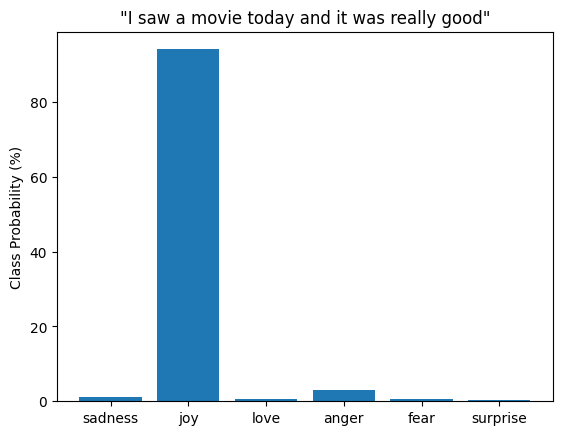

In [103]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df['score'], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel('Class Probability (%)')
plt.show()